<a href="https://colab.research.google.com/github/Kabshah/Summer25/blob/main/ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3: Optical Character Recognition (OCR)

Use Python to build a basic OCR system that can extract text from images
containing printed or handwritten text. Work with libraries like Tesseract and
OpenCV to preprocess the images, apply OCR, and display the extracted text. Test
the system on various sample images and see the results.

In [ ]:
!apt-get install tesseract-ocr -y
!apt-get install libtesseract-dev -y
!pip install pytesseract opencv-python-headless pillow numpy matplotlib easyocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import io
import easyocr

🚀 ADVANCED OCR SYSTEM
🔧 Initializing OCR engines...
✅ OCR engines ready!

📤 Upload your image(s) to extract text...
Supported formats: JPG, PNG, JPEG, BMP, TIFF
--------------------------------------------------------------------------------


Saving Screenshot 2025-10-15 160134.png to Screenshot 2025-10-15 160134.png


📄 Processing: Screenshot 2025-10-15 160134.png

📊 OPTION 1: Best Quality (All preprocessing techniques)
--------------------------------------------------------------------------------


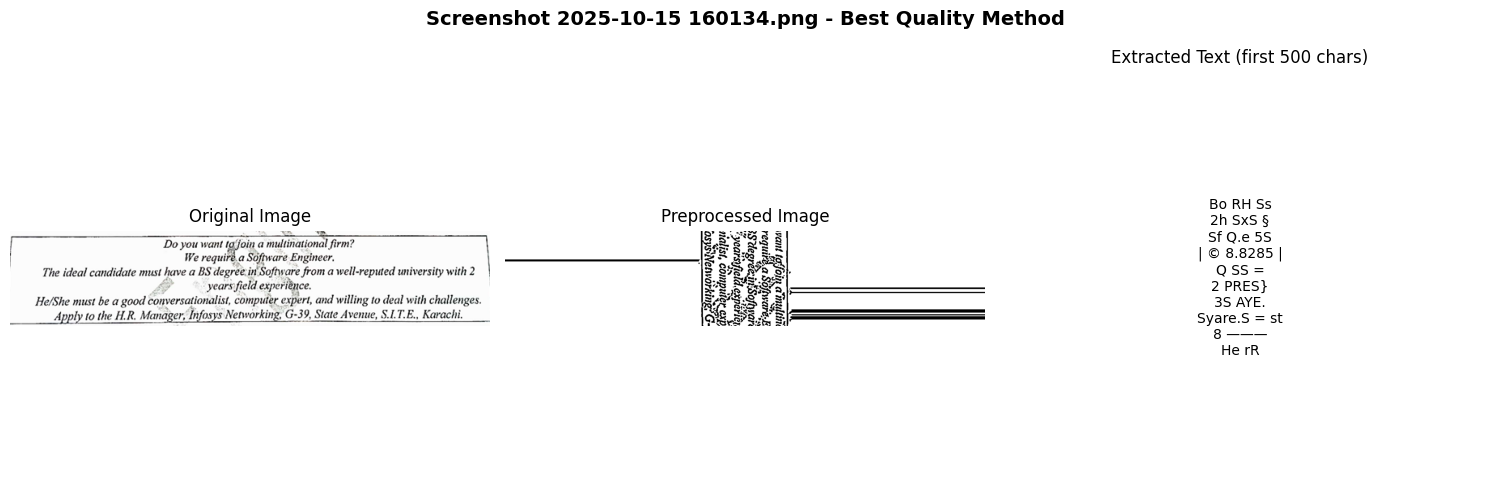


COMPLETE EXTRACTED TEXT:
Bo RH Ss
2h SxS §
Sf Q.e 5S
| © 8.8285 |
Q SS =
2 PRES}
3S AYE.
Syare.S = st
8 ———
He rR


📊 OPTION 2: Using EasyOCR (Better for handwritten text)
--------------------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


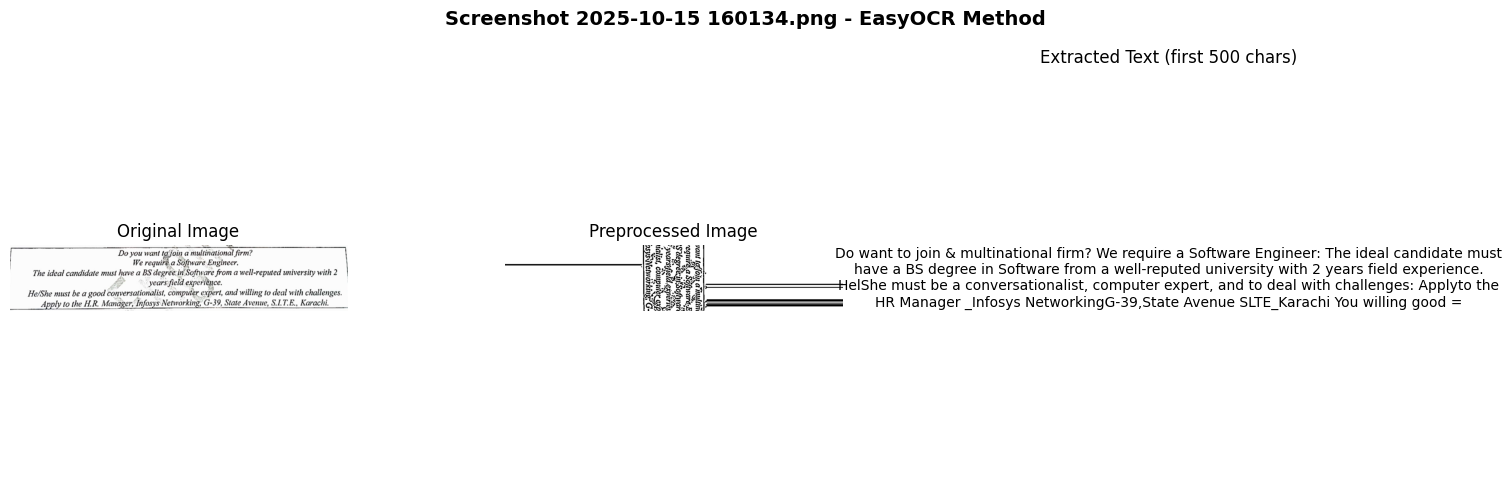


COMPLETE EXTRACTED TEXT:
Do want to join & multinational firm? We require a Software Engineer: The ideal candidate must have a BS degree in Software from a well-reputed university with 2 years field experience. HelShe must be a conversationalist, computer expert, and to deal with challenges: Applyto the HR Manager _Infosys NetworkingG-39,State Avenue SLTE_Karachi You willing good =


🔬 Want to test multiple preprocessing methods? (y/n)
This will show results with different preprocessing techniques


✅ ALL IMAGES PROCESSED!


In [ ]:
class AdvancedOCR:
    def __init__(self):
        """Initialize OCR engines"""
        print("🔧 Initializing OCR engines...")
        self.tesseract_config = r'--oem 3 --psm 6'
        # Initialize EasyOCR for better handwritten text recognition
        self.easyocr_reader = easyocr.Reader(['en'], gpu=True)
        print("✅ OCR engines ready!")

    def preprocess_image(self, image, method='adaptive'):
        """
        Advanced preprocessing with multiple techniques
        Methods: 'adaptive', 'otsu', 'gaussian', 'bilateral', 'morphology', 'all'
        """
        # Convert to grayscale
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray = image.copy()

        if method == 'adaptive':
            # Adaptive thresholding - best for varying lighting
            processed = cv2.adaptiveThreshold(
                gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                cv2.THRESH_BINARY, 11, 2
            )

        elif method == 'otsu':
            # Otsu's thresholding - good for bimodal images
            blur = cv2.GaussianBlur(gray, (5, 5), 0)
            _, processed = cv2.threshold(
                blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
            )

        elif method == 'gaussian':
            # Gaussian blur with thresholding
            blur = cv2.GaussianBlur(gray, (5, 5), 0)
            _, processed = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

        elif method == 'bilateral':
            # Bilateral filter - preserves edges while removing noise
            blur = cv2.bilateralFilter(gray, 9, 75, 75)
            _, processed = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        elif method == 'morphology':
            # Morphological operations - removes noise
            blur = cv2.GaussianBlur(gray, (5, 5), 0)
            _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            kernel = np.ones((2, 2), np.uint8)
            processed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
            processed = cv2.morphologyEx(processed, cv2.MORPH_OPEN, kernel)

        elif method == 'all':
            # Combined approach - best quality
            # Noise reduction
            denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
            # Contrast enhancement
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            enhanced = clahe.apply(denoised)
            # Adaptive thresholding
            processed = cv2.adaptiveThreshold(
                enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                cv2.THRESH_BINARY, 11, 2
            )
            # Morphological operations
            kernel = np.ones((2, 2), np.uint8)
            processed = cv2.morphologyEx(processed, cv2.MORPH_CLOSE, kernel)

        else:
            processed = gray

        return processed

    def deskew_image(self, image):
        """Automatically deskew/straighten tilted images"""
        coords = np.column_stack(np.where(image > 0))
        if len(coords) == 0:
            return image
        angle = cv2.minAreaRect(coords)[-1]
        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle

        # Only deskew if angle is significant
        if abs(angle) > 0.5:
            (h, w) = image.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, angle, 1.0)
            rotated = cv2.warpAffine(
                image, M, (w, h),
                flags=cv2.INTER_CUBIC,
                borderMode=cv2.BORDER_REPLICATE
            )
            return rotated
        return image

    def resize_image(self, image, scale_factor=2):
        """Upscale image for better OCR accuracy"""
        height, width = image.shape[:2]
        new_height = int(height * scale_factor)
        new_width = int(width * scale_factor)
        resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
        return resized

    def extract_text_tesseract(self, image, config=''):
        """Extract text using Tesseract OCR"""
        if not config:
            config = self.tesseract_config
        text = pytesseract.image_to_string(image, config=config)
        return text.strip()

    def extract_text_easyocr(self, image):
        """Extract text using EasyOCR (better for handwritten text)"""
        results = self.easyocr_reader.readtext(image)
        text = ' '.join([result[1] for result in results])
        return text.strip()

    def process_and_extract(self, image_path_or_array, preprocessing='all',
                          deskew=True, upscale=True, use_easyocr=False):
        """
        Complete pipeline: preprocess + extract text
        """
        # Load image
        if isinstance(image_path_or_array, str):
            image = cv2.imread(image_path_or_array)
        else:
            image = image_path_or_array

        if image is None:
            return "Error: Could not load image", None, None

        original = image.copy()

        # Upscale if needed
        if upscale:
            image = self.resize_image(image, scale_factor=2)

        # Preprocess
        processed = self.preprocess_image(image, method=preprocessing)

        # Deskew
        if deskew:
            processed = self.deskew_image(processed)

        # Extract text
        if use_easyocr:
            text = self.extract_text_easyocr(image)
        else:
            text = self.extract_text_tesseract(processed)

        return text, original, processed

    def visualize_results(self, original, processed, text, title="OCR Results"):
        """Display original, processed images and extracted text"""
        plt.figure(figsize=(15, 5))

        # Original image
        plt.subplot(1, 3, 1)
        if len(original.shape) == 3:
            plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(original, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        # Processed image
        plt.subplot(1, 3, 2)
        plt.imshow(processed, cmap='gray')
        plt.title('Preprocessed Image')
        plt.axis('off')

        # Extracted text
        plt.subplot(1, 3, 3)
        plt.text(0.5, 0.5, text[:500], ha='center', va='center',
                wrap=True, fontsize=10)
        plt.title('Extracted Text (first 500 chars)')
        plt.axis('off')

        plt.suptitle(title, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Print full text
        print("\n" + "="*80)
        print("COMPLETE EXTRACTED TEXT:")
        print("="*80)
        print(text if text else "No text detected")
        print("="*80 + "\n")

    def batch_process_with_methods(self, image, methods=['adaptive', 'otsu', 'all']):
        """Try multiple preprocessing methods and show results"""
        print("🔍 Testing multiple preprocessing methods...\n")

        results = {}
        for method in methods:
            print(f"Processing with method: {method.upper()}")
            text, original, processed = self.process_and_extract(
                image, preprocessing=method, deskew=True, upscale=True
            )
            results[method] = {
                'text': text,
                'original': original,
                'processed': processed
            }
            self.visualize_results(original, processed, text,
                                 title=f"Method: {method.upper()}")

        return results

# Main execution
print("="*80)
print("🚀 ADVANCED OCR SYSTEM")
print("="*80)

# Initialize OCR system
ocr = AdvancedOCR()

print("\n📤 Upload your image(s) to extract text...")
print("Supported formats: JPG, PNG, JPEG, BMP, TIFF")
print("-"*80)

# Upload files
uploaded = files.upload()

# Process each uploaded image
for filename, data in uploaded.items():
    print(f"\n\n{'='*80}")
    print(f"📄 Processing: {filename}")
    print("="*80)

    # Load image from uploaded data
    image = Image.open(io.BytesIO(data))
    image_array = np.array(image)

    # Convert RGB to BGR for OpenCV
    if len(image_array.shape) == 3 and image_array.shape[2] == 3:
        image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

    print("\n📊 OPTION 1: Best Quality (All preprocessing techniques)")
    print("-"*80)
    text1, orig1, proc1 = ocr.process_and_extract(
        image_array, preprocessing='all', deskew=True, upscale=True
    )
    ocr.visualize_results(orig1, proc1, text1,
                         title=f"{filename} - Best Quality Method")

    print("\n📊 OPTION 2: Using EasyOCR (Better for handwritten text)")
    print("-"*80)
    text2, orig2, proc2 = ocr.process_and_extract(
        image_array, preprocessing='all', deskew=True,
        upscale=True, use_easyocr=True
    )
    ocr.visualize_results(orig2, proc2, text2,
                         title=f"{filename} - EasyOCR Method")

    # Optional: Test multiple methods
    print("\n🔬 Want to test multiple preprocessing methods? (y/n)")
    print("This will show results with different preprocessing techniques")

print("\n\n" + "="*80)
print("✅ ALL IMAGES PROCESSED!")
print("="*80)
print("="*80)